In [1]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

print('총 샘플의 개수 : {}'.format(len(result)))

LookupError: ignored

In [2]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [4]:
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [5]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.847781777381897), ('guy', 0.8074128031730652), ('lady', 0.7654678821563721), ('boy', 0.7513607144355774), ('soldier', 0.7493841052055359), ('gentleman', 0.7433596849441528), ('girl', 0.7391026616096497), ('kid', 0.7031369209289551), ('friend', 0.6737311482429504), ('poet', 0.6695201992988586)]


In [6]:
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.847781777381897), ('guy', 0.8074128031730652), ('lady', 0.7654678821563721), ('boy', 0.7513607144355774), ('soldier', 0.7493841052055359), ('gentleman', 0.7433596849441528), ('girl', 0.7391026616096497), ('kid', 0.7031369209289551), ('friend', 0.6737311482429504), ('poet', 0.6695201992988586)]


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

train_data = pd.read_table('ratings.txt')

train_data[:5] # 상위 5개 출력

ModuleNotFoundError: ignored

In [8]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 636 kB/s 
     |████████████████████████████████| 453 kB 71.6 MB/s 


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

train_data = pd.read_table('ratings.txt')

train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [10]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [11]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

True


In [12]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [13]:
print(len(train_data)) # 리뷰 개수 출력

199992


In [14]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5] # 상위 5개 출력

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [15]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

NameError: ignored

In [19]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('총 샘플 수 :',len(documents))



총 샘플 수 : 11314


In [20]:
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

news_df.isnull().values.any()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


False

In [23]:
news_df.replace("", float("NaN"), inplace=True)
news_df.isnull().values.any()

news_df.dropna(inplace=True)
print('총 샘플 수 :',len(news_df))

총 샘플 수 : 10995


In [26]:
# 불용어를 제거
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.to_list()

# 단어가 1개 이하인 샘플의 인덱스를 찾아서 저장하고, 해당 샘플들은 제거.
drop_train = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]
tokenized_doc = np.delete(tokenized_doc, drop_train, axis=0)
print('총 샘플 수 :',len(tokenized_doc))

총 샘플 수 : 10940


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

word2idx = tokenizer.word_index
idx2word = {value : key for key, value in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)

print(encoded[:2])

[[9, 59, 603, 207, 3278, 1495, 474, 702, 9470, 13686, 5533, 15227, 702, 442, 702, 70, 1148, 1095, 1036, 20294, 984, 705, 4294, 702, 217, 207, 1979, 15228, 13686, 4865, 4520, 87, 1530, 6, 52, 149, 581, 661, 4406, 4988, 4866, 1920, 755, 10668, 1102, 7837, 442, 957, 10669, 634, 51, 228, 2669, 4989, 178, 66, 222, 4521, 6066, 68, 4295], [1026, 532, 2, 60, 98, 582, 107, 800, 23, 79, 4522, 333, 7838, 864, 421, 3825, 458, 6488, 458, 2700, 4730, 333, 23, 9, 4731, 7262, 186, 310, 146, 170, 642, 1260, 107, 33568, 13, 985, 33569, 33570, 9471, 11491]]


In [28]:
vocab_size = len(word2idx) + 1 
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 64277


In [34]:
from tensorflow.keras.preprocessing.sequence import skipgrams
# 네거티브 샘플링
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:10]]

# 첫번째 샘플인 skip_grams[0] 내 skipgrams로 형성된 데이터셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(5):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          idx2word[pairs[i][0]], pairs[i][0], 
          idx2word[pairs[i][1]], pairs[i][1], 
          labels[i]))
    
print('전체 샘플 수 :',len(skip_grams))
# 첫번째 뉴스그룹 샘플에 대해서 생긴 pairs와 labels의 개수
print(len(pairs))
print(len(labels))

(statement (474), readding (27511)) -> 0
(media (702), world (70)) -> 1
(least (87), xsession (8140)) -> 0
(lived (1148), incidences (20294)) -> 1
(shame (4988), bekins (63316)) -> 0
전체 샘플 수 : 10
2220
2220


In [35]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

embedding_dim = 100

# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

# 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding  = Embedding(vocab_size, embedding_dim)(c_inputs)

dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True, rankdir='TB')

for epoch in range(1, 6):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)  
    print('Epoch :',epoch, 'Loss :',loss)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 100)       6427700     ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 100)       6427700     ['input_2[0][0]']                
                                                                                              

In [36]:
import gensim

f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

# 모델 로드
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)


w2v.most_similar(positive=['soldiers'])

w2v.most_similar(positive=['doctor'])

w2v.most_similar(positive=['police'])

w2v.most_similar(positive=['knife'])

w2v.most_similar(positive=['engine'])

NameError: ignored

In [37]:
pip install glove_python_binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 948 kB 7.4 MB/s 


In [39]:
from glove import Corpus, Glove

corpus = Corpus() 

# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성
corpus.fit(result, window=5)
glove = Glove(no_components=100, learning_rate=0.05)

# 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

print(glove.most_similar("man"))
print(glove.most_similar("boy"))
print(glove.most_similar("university"))
print(glove.most_similar("water"))
print(glove.most_similar("physics"))
print(glove.most_similar("muscle"))
print(glove.most_similar("clean"))

Performing 20 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
[('woman', 0.9618514222427003), ('guy', 0.8828273948655072), ('girl', 0.8688642264107446), ('kid', 0.8398276062880693)]
[('girl', 0.9351698945753044), ('woman', 0.8284558675211461), ('kid', 0.8262366037025202), ('man', 0.810623329950713)]
[('harvard', 0.8946894398671652), ('mit', 0.8637708532434683), ('stanford', 0.8544994104083442), ('cambridge', 0.8474521916384097)]
[('clean', 0.845721816597158), ('air', 0.8351656490744751), ('fresh', 0.8350827336804844), ('electricity', 0.8151050991562745)]
[('chemistry', 0.8894826329381691), ('economics', 0.8837147920612142), ('beauty', 0.8680758539263314), ('mathematics', 0.8641486302712563)]
[('tissue', 0.8280576145645345), ('nerve', 0.8154691089398582), ('channel', 0.7666620997976069), ('skeletal', 0.7643991884471096)]
[('fresh', 0.86

In [40]:
model.wv.most_similar("electrofishing")

AttributeError: ignored

In [41]:
from gensim.models import FastText

model = FastText(result, size=100, window=5, min_count=5, workers=4, sg=1)
model.wv.most_similar("electrofishing")

[('electrolux', 0.7909078598022461),
 ('electro', 0.7767801284790039),
 ('electrolyte', 0.774412989616394),
 ('airbus', 0.768999457359314),
 ('electroshock', 0.7578840255737305),
 ('electrochemical', 0.7554210424423218),
 ('electrogram', 0.7516226768493652),
 ('electric', 0.7451258897781372),
 ('electrons', 0.7422648668289185),
 ('electron', 0.7410904169082642)]

In [44]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1 # 패딩을 고려하여 +1
print('단어 집합 :',vocab_size)

X_encoded = tokenizer.texts_to_sequences(sentences)
print('정수 인코딩 결과 :',X_encoded)

max_len = max(len(l) for l in X_encoded)
print('최대 길이 :',max_len)

X_train = pad_sequences(X_encoded, maxlen=max_len, padding='post')
y_train = np.array(y_train)
print('패딩 결과 :')
print(X_train)

단어 집합 : 16
정수 인코딩 결과 : [[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]
최대 길이 : 4
패딩 결과 :
[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

embedding_dim = 4

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

print(X_train)

Epoch 1/100
1/1 - 1s - loss: 0.6897 - acc: 0.4286 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 0.6883 - acc: 0.4286 - 9ms/epoch - 9ms/step
Epoch 3/100
1/1 - 0s - loss: 0.6870 - acc: 0.5714 - 10ms/epoch - 10ms/step
Epoch 4/100
1/1 - 0s - loss: 0.6856 - acc: 0.5714 - 9ms/epoch - 9ms/step
Epoch 5/100
1/1 - 0s - loss: 0.6842 - acc: 0.5714 - 7ms/epoch - 7ms/step
Epoch 6/100
1/1 - 0s - loss: 0.6828 - acc: 0.5714 - 7ms/epoch - 7ms/step
Epoch 7/100
1/1 - 0s - loss: 0.6815 - acc: 0.5714 - 11ms/epoch - 11ms/step
Epoch 8/100
1/1 - 0s - loss: 0.6801 - acc: 0.5714 - 7ms/epoch - 7ms/step
Epoch 9/100
1/1 - 0s - loss: 0.6787 - acc: 0.5714 - 7ms/epoch - 7ms/step
Epoch 10/100
1/1 - 0s - loss: 0.6773 - acc: 0.5714 - 7ms/epoch - 7ms/step
Epoch 11/100
1/1 - 0s - loss: 0.6760 - acc: 0.7143 - 14ms/epoch - 14ms/step
Epoch 12/100
1/1 - 0s - loss: 0.6746 - acc: 0.7143 - 7ms/epoch - 7ms/step
Epoch 13/100
1/1 - 0s - loss: 0.6732 - acc: 0.7143 - 7ms/epoch - 7ms/step
Epoch 14/100
1/1 - 0s - loss: 0.6718 - acc:

In [46]:
from urllib.request import urlretrieve, urlopen
import gzip
import zipfile

urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", filename="glove.6B.zip")
zf = zipfile.ZipFile('glove.6B.zip')
zf.extractall() 
zf.close()

embedding_dict = dict()

f = open('glove.6B.100d.txt', encoding="utf8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]

    # 100개의 값을 가지는 array로 변환
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32')
    embedding_dict[word] = word_vector_arr
f.close()

print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

print(embedding_dict['respectable'])
print('벡터의 차원 수 :',len(embedding_dict['respectable']))

KeyboardInterrupt: ignored

In [47]:
%tensorflow_version 1.x 

TensorFlow is already loaded. Please restart the runtime to change versions.


In [48]:
pip install tensorflow-hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
import tensorflow_hub as hub
import tensorflow as tf
from keras import backend as K
import urllib.request
import pandas as pd
import numpy as np

elmo = hub.Module("https://tfhub.dev/google/elmo/1", trainable=True)
# 텐서플로우 허브로부터 ELMo를 다운로드

sess = tf.Session()
K.set_session(sess)
sess.run(tf.global_variables_initializer())
sess.run(tf.tables_initializer())

RuntimeError: ignored

In [50]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv', encoding='latin-1')
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [53]:
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
y_data = list(data['v1'])
X_data = list(data['v2'])

print(X_data[:5])
print(y_data[:5])

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though"]
[0, 0, 1, 0, 0]


In [54]:
print(len(X_data))
n_of_train = int(len(X_data) * 0.8)
n_of_test = int(len(X_data) - n_of_train)
print(n_of_train)
print(n_of_test)

5572
4457
1115


In [55]:
X_train = np.asarray(X_data[:n_of_train]) #X_data 데이터 중에서 앞의 4457개의 데이터만 저장
y_train = np.asarray(y_data[:n_of_train]) #y_data 데이터 중에서 앞의 4457개의 데이터만 저장
X_test = np.asarray(X_data[n_of_train:]) #X_data 데이터 중에서 뒤의 1115개의 데이터만 저장
y_test = np.asarray(y_data[n_of_train:]) #y_data 데이터 중에서 뒤의 1115개의 데이터만 저장

In [56]:
def ELMoEmbedding(x):
    return elmo(tf.squeeze(tf.cast(x, tf.string)), as_dict=True, signature="default")["default"]
# 데이터의 이동이 케라스 → 텐서플로우 → 케라스가 되도록 하는 함수

In [57]:
from keras.models import Model
from keras.layers import Dense, Lambda, Input

input_text = Input(shape=(1,), dtype=tf.string)
embedding_layer = Lambda(ELMoEmbedding, output_shape=(1024, ))(input_text)
hidden_layer = Dense(256, activation='relu')(embedding_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer)
model = Model(inputs=[input_text], outputs=output_layer)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=1, batch_size=60)

print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

NameError: ignored

In [59]:
!python -m gensim.scripts.word2vec2tensor --input eng_w2v --output eng_w2v

2022-06-10 03:01:01,065 - word2vec2tensor - INFO - running /usr/local/lib/python3.7/dist-packages/gensim/scripts/word2vec2tensor.py --input eng_w2v --output eng_w2v
2022-06-10 03:01:01,072 - utils_any2vec - INFO - loading projection weights from eng_w2v
2022-06-10 03:01:03,117 - utils_any2vec - INFO - loaded (21613, 100) matrix from eng_w2v
2022-06-10 03:01:04,949 - word2vec2tensor - INFO - 2D tensor file saved to eng_w2v_tensor.tsv
2022-06-10 03:01:04,949 - word2vec2tensor - INFO - Tensor metadata file saved to eng_w2v_metadata.tsv
2022-06-10 03:01:04,952 - word2vec2tensor - INFO - finished running word2vec2tensor.py


In [62]:
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import re
from PIL import Image
from io import BytesIO
from nltk.tokenize import RegexpTokenizer
import nltk
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity

urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/data.csv", filename="data.csv")
df = pd.read_csv("data.csv")
print('전체 문서의 수 :',len(df))
df[:5]

전체 문서의 수 : 2382


,Unnamed: 0,Desc,Unnamed: 0.1,author,genre,image_link,rating,title
0,0,We know that power is shifting: From West to E...,0.0,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,1,Following the success of The Accidental Billio...,1.0,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,2,How to tap the power of social software and ne...,2.0,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...
3,3,William J. Bernstein is an American financial ...,3.0,William J. Bernstein,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.20,The Four Pillars of Investing
4,4,Amazing book. And I joined Steve Jobs and many...,4.0,Akio Morita,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Made in Japan: Akio Morita and Sony


In [63]:
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

def make_lower_case(text):
    return text.lower()

def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

df['cleaned'] = df['Desc'].apply(_removeNonAscii)
df['cleaned'] = df.cleaned.apply(make_lower_case)
df['cleaned'] = df.cleaned.apply(remove_stop_words)
df['cleaned'] = df.cleaned.apply(remove_punctuation)
df['cleaned'] = df.cleaned.apply(remove_html)

df['cleaned'][:5]

0    know power shifting west east north south pres...
1    following success accidental billionaires mone...
2    tap power social software networks build busin...
3    william j bernstein american financial theoris...
4    amazing book joined steve jobs many akio morit...
Name: cleaned, dtype: object

In [65]:
df['cleaned'].replace('', np.nan, inplace=True)
df = df[df['cleaned'].notna()]
print('전체 문서의 수 :',len(df))

corpus = []
for words in df['cleaned']:
    corpus.append(words.split())

전체 문서의 수 : 2381


In [66]:
urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
                           filename="GoogleNews-vectors-negative300.bin.gz")

word2vec_model = Word2Vec(size = 300, window=5, min_count = 2, workers = -1)
word2vec_model.build_vocab(corpus)
word2vec_model.intersect_word2vec_format('GoogleNews-vectors-negative300.bin.gz', lockf=1.0, binary=True)
word2vec_model.train(corpus, total_examples = word2vec_model.corpus_count, epochs = 15)

ValueError: ignored

In [67]:
def get_document_vectors(document_list):
    document_embedding_list = []

    # 각 문서에 대해서
    for line in document_list:
        doc2vec = None
        count = 0
        for word in line.split():
            if word in word2vec_model.wv.vocab:
                count += 1
                # 해당 문서에 있는 모든 단어들의 벡터값을 더한다.
                if doc2vec is None:
                    doc2vec = word2vec_model[word]
                else:
                    doc2vec = doc2vec + word2vec_model[word]

        if doc2vec is not None:
            # 단어 벡터를 모두 더한 벡터의 값을 문서 길이로 나눠준다.
            doc2vec = doc2vec / count
            document_embedding_list.append(doc2vec)

    # 각 문서에 대한 문서 벡터 리스트를 리턴
    return document_embedding_list

In [68]:
document_embedding_list = get_document_vectors(df['cleaned'])
print('문서 벡터의 수 :',len(document_embedding_list))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


문서 벡터의 수 : 2381


In [69]:
cosine_similarities = cosine_similarity(document_embedding_list, document_embedding_list)
print('코사인 유사도 매트릭스의 크기 :',cosine_similarities.shape)

코사인 유사도 매트릭스의 크기 : (2381, 2381)


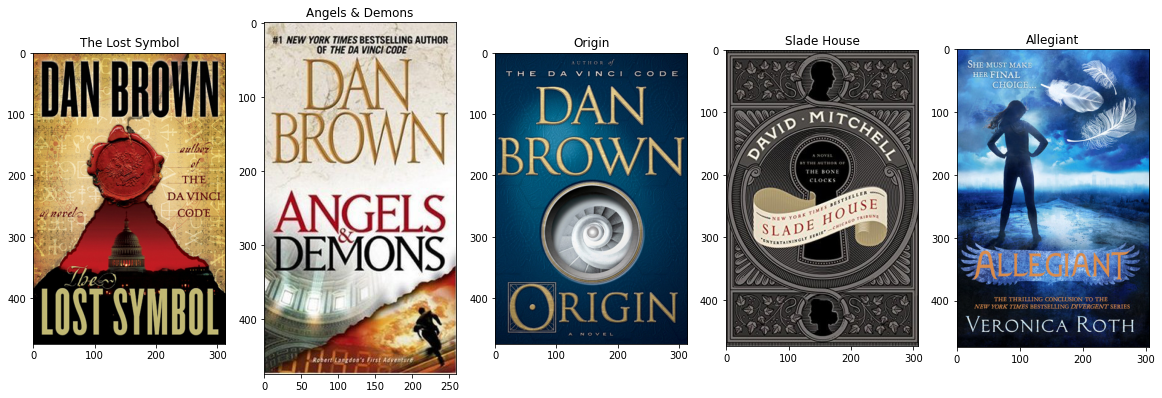

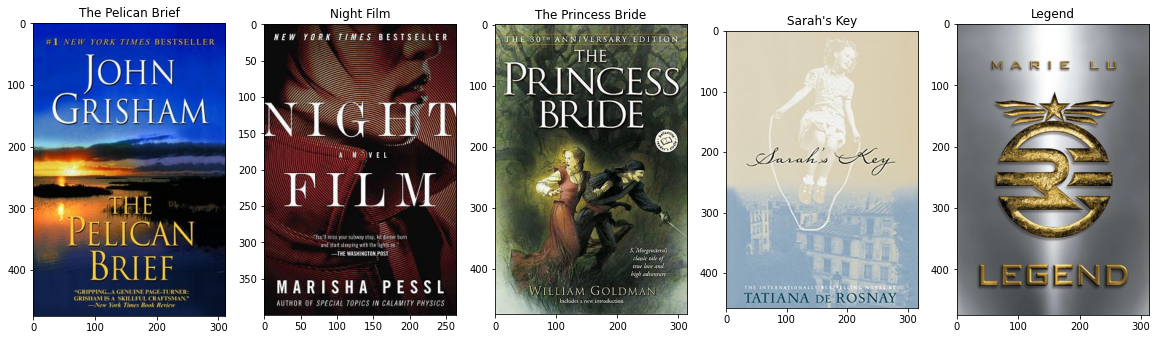

In [71]:
def recommendations(title):
    books = df[['title', 'image_link']]

    # 책의 제목을 입력하면 해당 제목의 인덱스를 리턴받아 idx에 저장.
    indices = pd.Series(df.index, index = df['title']).drop_duplicates()    
    idx = indices[title]

    # 입력된 책과 줄거리(document embedding)가 유사한 책 5개 선정.
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]

    # 가장 유사한 책 5권의 인덱스
    book_indices = [i[0] for i in sim_scores]

    # 전체 데이터프레임에서 해당 인덱스의 행만 추출. 5개의 행을 가진다.
    recommend = books.iloc[book_indices].reset_index(drop=True)

    fig = plt.figure(figsize=(20, 30))

    # 데이터프레임으로부터 순차적으로 이미지를 출력
    for index, row in recommend.iterrows():
        response = requests.get(row['image_link'])
        img = Image.open(BytesIO(response.content))
        fig.add_subplot(1, 5, index + 1)
        plt.imshow(img)
        plt.title(row['title'])

recommendations("The Da Vinci Code")
recommendations("The Murder of Roger Ackroyd")

In [73]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 20000

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
print('훈련용 리뷰 개수 :',len(X_train))
print('테스트용 리뷰 개수 :',len(X_test))

print('훈련 데이터의 첫번째 샘플 :',X_train[0])
print('훈련 데이터의 첫번째 샘플의 레이블 :',y_train[0])

17473536/17464789 [==============================] - 0s 0us/step
훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
훈련 데이터의 첫번째 샘플 : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 

In [74]:
print('훈련용 리뷰의 평규 길이: {}'.format(np.mean(list(map(len, X_train)), dtype=int)))
print('테스트용 리뷰의 평균 길이: {}'.format(np.mean(list(map(len, X_test)), dtype=int)))

max_len = 400

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
print('X_train의 크기(shape) :', X_train.shape)
print('X_test의 크기(shape) :', X_test.shape)

훈련용 리뷰의 평규 길이: 238
테스트용 리뷰의 평균 길이: 230
X_train의 크기(shape) : (25000, 400)
X_test의 크기(shape) : (25000, 400)


In [75]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 64

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))

# 모든 단어 벡터의 평균을 구한다.
model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('embedding_average_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, y_train, batch_size=32, epochs=10, callbacks=[es, mc], validation_split=0.2)

loaded_model = load_model('embedding_average_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

Epoch 1/10
619/625 [============================>.] - ETA: 0s - loss: 0.6300 - acc: 0.7117
Epoch 1: val_acc improved from -inf to 0.76100, saving model to embedding_average_model.h5
625/625 [==============================] - 5s 6ms/step - loss: 0.6291 - acc: 0.7125 - val_loss: 0.5287 - val_acc: 0.7610
Epoch 2/10
611/625 [============================>.] - ETA: 0s - loss: 0.4298 - acc: 0.8550
Epoch 2: val_acc improved from 0.76100 to 0.86780, saving model to embedding_average_model.h5
625/625 [==============================] - 3s 4ms/step - loss: 0.4286 - acc: 0.8550 - val_loss: 0.3769 - val_acc: 0.8678
Epoch 3/10
612/625 [============================>.] - ETA: 0s - loss: 0.3178 - acc: 0.8915
Epoch 3: val_acc improved from 0.86780 to 0.88060, saving model to embedding_average_model.h5
625/625 [==============================] - 2s 4ms/step - loss: 0.3170 - acc: 0.8919 - val_loss: 0.3220 - val_acc: 0.8806
Epoch 4/10
617/625 [============================>.] - ETA: 0s - loss: 0.2602 - acc: 0

In [76]:
# dart.csv 파일 다운로드
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1nIUZxASrbIa0Z2xzGVgX1dqjtnFCoKNT' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1nIUZxASrbIa0Z2xzGVgX1dqjtnFCoKNT" -O dart.csv && rm -rf /tmp/cookies.txt

--2022-06-10 03:19:00--  https://docs.google.com/uc?export=download&confirm=t&id=1nIUZxASrbIa0Z2xzGVgX1dqjtnFCoKNT
Resolving docs.google.com (docs.google.com)... 74.125.142.100, 74.125.142.139, 74.125.142.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b1am9uh3avh63u2a5d7m12fvt7k43g8j/1654831125000/17609157229046208934/*/1nIUZxASrbIa0Z2xzGVgX1dqjtnFCoKNT?e=download [following]
--2022-06-10 03:19:00--  https://doc-04-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/b1am9uh3avh63u2a5d7m12fvt7k43g8j/1654831125000/17609157229046208934/*/1nIUZxASrbIa0Z2xzGVgX1dqjtnFCoKNT?e=download
Resolving doc-04-7k-docs.googleusercontent.com (doc-04-7k-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-04-7k-docs.googleusercontent.com (doc-04-7k

In [77]:
# 형태소 분석기 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 17.82 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-06-10 03:19:12--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c5:2ef4, 2406:da00:ff00::22e9:9f55, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://b

In [80]:
import pandas as pd
from konlpy.tag import Mecab
from gensim.models.doc2vec import TaggedDocument
from tqdm import tqdm

df = pd.read_csv('/content/dart.csv',  sep=',')
df = df.dropna()
df

mecab = Mecab()

tagged_corpus_list = []

for index, row in tqdm(df.iterrows(), total=len(df)):
  text = row['business']
  tag = row['name']
  tagged_corpus_list.append(TaggedDocument(tags=[tag], words=mecab.morphs(text)))

print('문서의 수 :', len(tagged_corpus_list))

Exception: ignored

In [1]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [806 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelea

In [3]:
# dart.csv 파일 다운로드
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1nIUZxASrbIa0Z2xzGVgX1dqjtnFCoKNT' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1nIUZxASrbIa0Z2xzGVgX1dqjtnFCoKNT" -O dart.csv && rm -rf /tmp/cookies.txt

--2022-06-10 03:37:29--  https://docs.google.com/uc?export=download&confirm=t&id=1nIUZxASrbIa0Z2xzGVgX1dqjtnFCoKNT
Resolving docs.google.com (docs.google.com)... 74.125.26.113, 74.125.26.100, 74.125.26.139, ...
Connecting to docs.google.com (docs.google.com)|74.125.26.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ga1eq9anmgs6cm629dirhv43j0iras1e/1654832175000/17609157229046208934/*/1nIUZxASrbIa0Z2xzGVgX1dqjtnFCoKNT?e=download [following]
--2022-06-10 03:37:29--  https://doc-04-7k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ga1eq9anmgs6cm629dirhv43j0iras1e/1654832175000/17609157229046208934/*/1nIUZxASrbIa0Z2xzGVgX1dqjtnFCoKNT?e=download
Resolving doc-04-7k-docs.googleusercontent.com (doc-04-7k-docs.googleusercontent.com)... 173.194.215.132, 2607:f8b0:400c:c11::84
Connecting to doc-04-7k-docs.googleusercontent.com (doc-04-7k-do

In [4]:
import pandas as pd
from konlpy.tag import Mecab
from gensim.models.doc2vec import TaggedDocument
from tqdm import tqdm

df = pd.read_csv('/content/dart.csv',  sep=',')
df = df.dropna()
df

mecab = Mecab()

tagged_corpus_list = []

for index, row in tqdm(df.iterrows(), total=len(df)):
  text = row['business']
  tag = row['name']
  tagged_corpus_list.append(TaggedDocument(tags=[tag], words=mecab.morphs(text)))

print('문서의 수 :', len(tagged_corpus_list))

100%|██████████| 2295/2295 [01:43<00:00, 22.20it/s]

문서의 수 : 2295


In [5]:
tagged_corpus_list[0]

TaggedDocument(words=['II', '.', '사업', '의', '내용', '1', '.', '사업', '의', '개요', '가', '.', '일반', '적', '인', '사항', '기업', '회계', '기준', '서', '제', '1110', '호', '"', '연결', '재무제표', '"', '의', '의하', '여', '2018', '년', '12', '월', '17', '일', '에', '설립', '한', '동화', '크립톤', '기업가', '정신', '제일', '호', '창업', '벤처', '전문', '사모', '투자', '합자회사', '를', '종속', '회사', '에', '편입', '하', '였', '습니다', '.', '나', '.', '지배', '기업', '의', '현황', '1', ')', '산업', '의', '특성', '제약', '산업', '은', '약학', ',', '화학', ',', '생물학', '등', '여러', '분야', '의', '지식', '과', '기술', '이', '복합', '적', '으로', '필요', '한', '기술', '·', '지식', '집약', '형', '산업', '으로', '인간', '의', '생명', '과', '보건', '에', '직접', '적', '으로', '관련', '된', '제품', '을', '생산', '하', '고', ',', '개발', '·', '제조', '·', '유통', '·', '가격', '등', '을', '정부', '에서', '엄격', '하', '게', '규제', '하', '고', '관리', '하', '는', '산업', '적', '특성', '을', '가지', '고', '있', '습니다', '.', '또한', '신약', '개발', '에', '는', '막대', '한', '시간', '과', '비용', '이', '소요', '되', '며', ',', '성공', '확률', '또한', '높', '지', '않', '으나', '신약', '개발', '에', '성공', '할', '경우', '엔', '엄청난

In [6]:
from gensim.models import doc2vec

model = doc2vec.Doc2Vec(vector_size=300, alpha=0.025, min_alpha=0.025, workers=8, window=8)

# Vocabulary 빌드
model.build_vocab(tagged_corpus_list)
print(f"Tag Size: {len(model.docvecs.doctags.keys())}", end=' / ')

# Doc2Vec 학습
model.train(tagged_corpus_list, total_examples=model.corpus_count, epochs=50)

# 모델 저장
model.save('dart.doc2vec')

Tag Size: 2295 / 

KeyboardInterrupt: ignored